# Математичекая Статистика
## Лабораторная Работа №3 «Статистические Гипотезы», Вариант 5

Румянцев Алексей Александрович, 368731, Поток Мат Стат 31.2

### Условие задания

Для каждой проблемы нужно провести два статистических теста, если не сказано иное, причем первый из критериев нужно реализовать самостоятельно (считать и выводить значение статистики, критическое значение, `p-value`), в качестве второго можно воспользоваться готовой реализацией. Также нужно отдельно указывать, как формализуются $Н_0$ и $Н_1$ для выбранных тестов. Уровень значимости выбираете сами.

В файле [`song_data.csv`](https://drive.google.com/file/d/1KRbKtVb6Xkyc8_2gKT9G6N5N_yD7FQXC/view) представлены данные о музыкальных произведениях
1. Предположите с каким вероятностным законом распределен рейтинг песни. С помощью стат. теста подтвердите/опровергните это предположение.
2. Верно ли, что распределение рейтинга у коротких и длинных песен одинаково (порог продолжительности выбирайте сами)?
3. Верно ли, что рейтинг и танцевальность связаны?

### Выполнение

H_0 нормальное. [Источник 1](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7), [Источник 2](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5), [Источник 3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Источник 4](https://cdn.scribbr.com/wp-content/uploads/2022/05/chi-square-distribution-table.png)

In [723]:
ACCEPT = "Accept null hypothesis"
REJECT = "Reject null hypothesis with respect to given alternative"

def print_reject_or_accept(condition):
  if condition:
    print(REJECT)
  else:
    print(ACCEPT)

In [724]:
from pathlib import Path
import os

import pandas as pd


path = Path().resolve()
filename = 'song_data.csv'
data = pd.read_csv(os.path.join(path, filename))
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [725]:
ratings = data['song_popularity']
n = len(ratings)
n

18835

In [726]:
import numpy as np

k = int(1 + np.floor(np.log2(n)))
k

15

In [727]:
intervals = np.linspace(ratings.min(), ratings.max(), k + 1)
empir_freqs, bins = np.histogram(ratings, bins=intervals)
empir_freqs

array([ 802,  470,  497,  733,  908, 1080, 1796, 2391, 2137, 2572, 2329,
       1419,  863,  528,  310], dtype=int64)

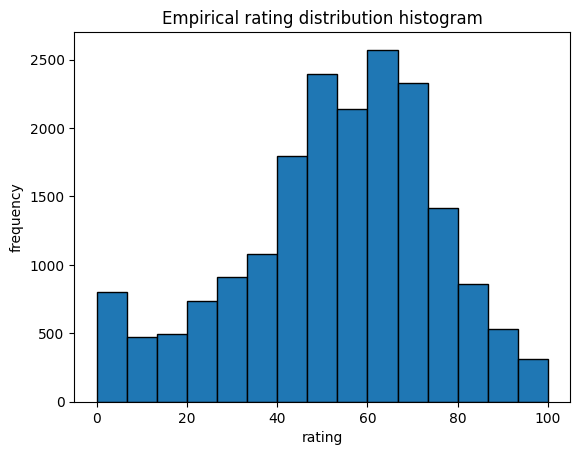

In [ ]:
import matplotlib.pyplot as plt


bin_width = bins[1] - bins[0]
plt.bar(bins[:-1], empir_freqs, width=bin_width, edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Song Ratings')
plt.show()

In [729]:
mu, sigma = ratings.mean(), ratings.std()
print(f'mu={mu}, sigma={sigma}')

mu=52.99187682505973, sigma=21.905654321614236


In [730]:
import scipy.stats as st


theor_freqs = []
for j in range(len(bins) - 1):
    p_j = st.norm.cdf(bins[j + 1], loc=mu, scale=sigma) - \
          st.norm.cdf(bins[j], loc=mu, scale=sigma)
    E_j = n * p_j
    theor_freqs.append(E_j)

np.array(theor_freqs)

array([ 177.908,  336.954,  582.136,  917.402, 1318.796, 1729.334,
       2068.544, 2257.019, 2246.42 , 2039.537, 1689.107, 1276.047,
        879.346,  552.759,  316.951])

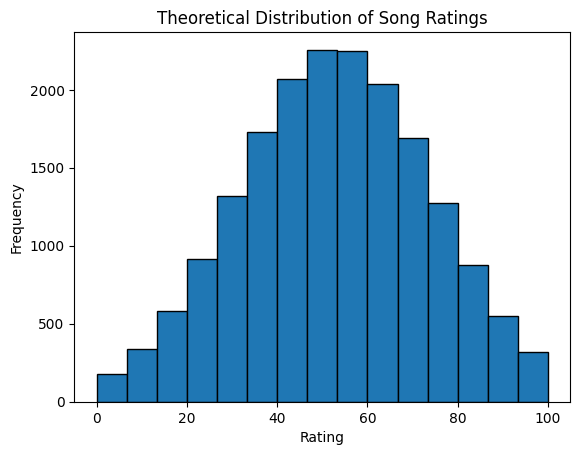

In [ ]:
bin_width = bins[1] - bins[0]
plt.bar(bins[:-1], theor_freqs, width=bin_width, edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Theoretical Distribution of Song Ratings')
plt.show()

In [732]:
chi2_score = np.sum((empir_freqs - theor_freqs) ** 2 / theor_freqs)
chi2_score

3111.2994661649764

Эмпирически нашли матожидание и среднеквадратическое отклонение. Иными словами, мы оценили два параметра, а значит `p = 2` (потеря информации при оценивании параметра)

In [733]:
p = 2
df = (k - 1) - p
df

12

Смотрим в таблицу по `df` и `alpha=0.05`

In [734]:
alpha = 0.05
crit_chi2 = 21.026

print_reject_or_accept(chi2_score > crit_chi2)

Reject null hypothesis with respect to given alternative


In [735]:
p_value = 1 - st.chi2.cdf(chi2_score, df)
p_value

0.0

In [736]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


In [737]:
stat, p_value = st.kstest(ratings, 'norm', args=(mu, sigma))
print(f'stat={stat}, p_value={p_value}')

stat=0.06170357136267912, p_value=8.782641743221739e-63


In [738]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


H_0 равны

In [739]:
duration = data['song_duration_ms']

threshold = np.median(duration)
short_songs_ratings = ratings[duration <= threshold]
long_songs_ratings = ratings[duration > threshold]

print(f'len_short={len(short_songs_ratings)}, len_long={len(long_songs_ratings)}')

len_short=9419, len_long=9416


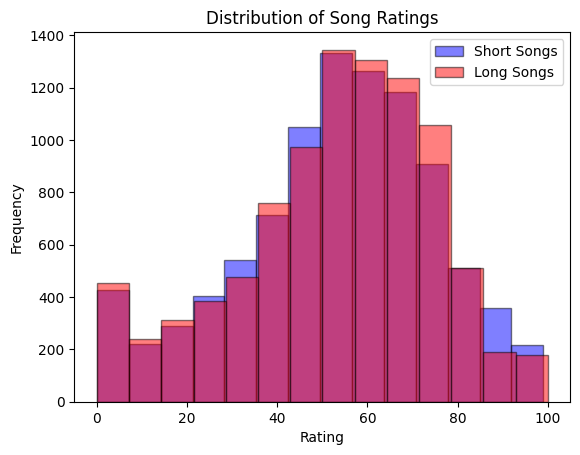

In [740]:
bins = min(int(1 + np.floor(np.log2(len(short_songs_ratings)))), int(1 + np.floor(np.log2(len(long_songs_ratings)))))
plt.hist(short_songs_ratings, bins=bins, alpha=0.5, label="Short Songs", color='blue', edgecolor='black')
plt.hist(long_songs_ratings, bins=bins, alpha=0.5, label="Long Songs", color='red', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Song Ratings')
plt.legend(loc='best')
plt.show()

Пропускаем сортировку (создание вариационного ряда) благодаря функции `rankdata` 

In [741]:
combined_ratings = np.concatenate((short_songs_ratings, long_songs_ratings))
ranks = st.rankdata(combined_ratings)
ranks

array([17362.5, 17362.5, 16867.5, ..., 13539.5, 12487.5,  9219.5])

In [742]:
ranks_short = ranks[:len(short_songs_ratings)]
ranks_long = ranks[len(short_songs_ratings):]

r_short = np.sum(ranks_short)
r_long = np.sum(ranks_long)

print(f'R_short={r_short}, R_long={r_long}')

R_short=88207355.0, R_long=89180675.0


In [743]:
m = len(short_songs_ratings)
n = len(long_songs_ratings)

u_short = m * n + 0.5 * m * (m + 1) - r_short
u_long = m * n + 0.5 * n * (n + 1) - r_long
u = min(u_short, u_long)
u

43843865.0

Для больших выборок статистика `U` распределена приблизительно нормально

In [744]:
mean_u = m * n / 2
mean_u

44344652.0

In [745]:
std_u = np.sqrt(m * n * (m + n + 1) / 12)
std_u

373112.106716824

In [746]:
q_1_m_alpha_div_2 = 1.96
crit_u = mean_u - q_1_m_alpha_div_2 * std_u
crit_u

43613352.27083503

In [747]:
print_reject_or_accept(u < crit_u)

Accept null hypothesis


In [748]:
z = (u - mean_u) / std_u
p_value = 2 * (1 - st.norm.cdf(abs(z)))
p_value

0.17953469213683615

In [749]:
print_reject_or_accept(p_value < alpha)

Accept null hypothesis


In [750]:
stat, p_value = st.ks_2samp(short_songs_ratings, long_songs_ratings)
p_value

0.011691247497192433

In [751]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative
